# **Important information for running FundFinder correctly**
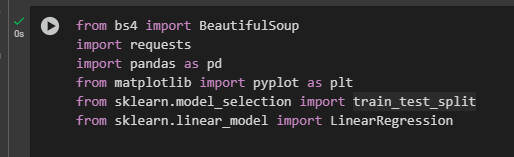

*Run each cell one by one DO NOT run next cell untill prior cell has green checkmark *shown in figure above*


# ***Imports***

In [1]:
from bs4 import BeautifulSoup # the beautiful soup library used to scrape websites
import requests # request library to send HTTP request to webpages for our beaufiul soup library to scrape from
import pandas as pd # pandas library used to create dataframes to store information
from matplotlib import pyplot as plt # ploting libarary used to create graphs for better visualization of data for users
from sklearn.model_selection import train_test_split # used to create a testing and a training dataset for our linear regression model
from sklearn.linear_model import LinearRegression # import for the linearregression model we will used to predict the next federal funds rate
from sklearn.metrics import mean_squared_error # used to check accuracy
import os # used to create folder

drive_mount = 0 #using as a flag to only run the mount one (incase someone runs cells multiple times)



# **Mount Google Drive if u wish to have excel/sheet files saved to ur google drive **
this is not something u have to do FundFinder will run either way this is a optional step

In [2]:
if drive_mount ==0: # this is done to only mount ur drive once code is added to program from clicking on folder icon on left hand side of the screen the from and . mount comes from giving colab acess ur your google drive

  from google.colab import drive #auto generated by google colab
  drive.mount('/content/drive') #auto generated by google colab
  drive_mount = 1
  print(" we mounted the drive")
else:
  print("drive is already mounted") # done to only mount the drive once in case u run this cell again



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 we mounted the drive


# **Create Folder for files to go**

In [3]:
folder_path = "/content/drive/MyDrive/FundFinder" #setting the path to create the folder
try:
  os.mkdir(folder_path) #create the folder in the path i selected above
  print('the folder was created')
except FileExistsError: # a exception since otherwise the program would give us a error if it was already created
  print("you have already made the file")

you have already made the file


# *Federal Fund Rate*

In [4]:
page_to_scrape = ("https://en.wikipedia.org/wiki/History_of_Federal_Open_Market_Committee_actions") #making the link a string so i can pass it though request.get

request_1 = requests.get(page_to_scrape) #http request to the website we want to scrape
print(request_1) # printing out the result of the request 200 = good to go otherwide = request denied

if request_1.status_code == 200: # start of if statement if the request is accepted we continue while it should never fail this is here just incase to prevent a error
  print("it was a accepted request") # printing to let us know the request was accpeted

  soup1 = BeautifulSoup(request_1.text, "lxml") #we are requesting the text the soup is used read the information on the page we requested and the lxml is model for reading the raw data of the page from the request

  table1=soup1.find("table",class_ ="wikitable sortable") # we sort though the page and find the table we want information from the class is the tables class pulled from inspect element

  table_header = table1.find_all("th") # used to find all of the table headers flagged th

  column_titles = [] # created a empty list that will be used to create the column titles of our dataframe

  for i in table_header: #adds every th as a seperate column title
    title = i.text
    column_titles.append(title)

  df_Fund_Rate = pd.DataFrame(columns=column_titles) #creates dataframe with empty rows but uses the column titles found from th to create the column names

  rows = table1.find_all("tr") # finds all the tr or table rows

  for i in rows[1:]: # goes though all the rows and finds all the data from each cell of the table on the website and takes all the data and puts it into the dataframe we created before and we skip the column titles as well
    data = i.find_all("td") # finds all table data in each row
    row = [tr.text for tr in data] # takes the text from each of the cells of table data we found
    l = len(df_Fund_Rate) # sets it equal to the length of the dataframe the rows in particular
    df_Fund_Rate.loc[l] = row # adds the row to the dataframe

    print(df_Fund_Rate) #print statement





else:
  print("it was not a accepted request") # a failsafe in case for whatever reason the request was not allowed

Streaming output truncated to the last 5000 lines.
3     November 7, 2024\n     4.50%–4.75%\n         4.75%\n  12–0\n   
4   September 18, 2024\n     4.75%–5.00%\n         5.00%\n  11–1\n   
5        July 31, 2024\n     5.25%–5.50%\n         5.50%\n  12–0\n   
6        June 12, 2024\n     5.25%–5.50%\n         5.50%\n  12–0\n   
7          May 1, 2024\n     5.25%–5.50%\n         5.50%\n  12–0\n   
8       March 20, 2024\n     5.25%–5.50%\n         5.50%\n  12–0\n   
9     January 31, 2024\n     5.25%–5.50%\n         5.50%\n  12–0\n   
10   December 13, 2023\n     5.25%–5.50%\n         5.50%\n  12–0\n   
11    November 1, 2023\n     5.25%–5.50%\n         5.50%\n  12–0\n   
12  September 20, 2023\n     5.25%–5.50%\n         5.50%\n  12–0\n   
13       July 26, 2023\n     5.25%–5.50%\n         5.50%\n  11–0\n   
14       June 14, 2023\n     5.00%–5.25%\n         5.25%\n  11–0\n   
15         May 3, 2023\n     5.00%–5.25%\n         5.25%\n  11–0\n   
16      March 22, 2023\n     4.75%–5.00

# **Cleaning up the data we have scrapped**

In [5]:
df_Fund_Rate_Cleaned = df_Fund_Rate #creating a new dataframe this is mainly to keep things straight in my mind not really needed but i do it just in case
print(df_Fund_Rate_Cleaned.columns) #print the column names so i know how to spell them to have them cleaned
df_Fund_Rate_Cleaned["Discount Rate\n"] = df_Fund_Rate_Cleaned["Discount Rate\n"].astype(str) # set it is a str while it already is when u
df_Fund_Rate_Cleaned["Discount Rate\n"] = df_Fund_Rate_Cleaned["Discount Rate\n"].str.replace("\n","").str.replace("%","").str.replace("[","").str.replace("]","") # replaceing junk from scrapping with blanks
df_Fund_Rate_Cleaned["Discount Rate\n"] = df_Fund_Rate_Cleaned["Discount Rate\n"].astype(float) # converting to a float to make the linearregression training work

print(df_Fund_Rate_Cleaned)





Index(['Date\n', 'Fed. Funds Rate\n', 'Discount Rate\n', 'Votes\n', 'Notes\n'], dtype='object')
                   Date\n Fed. Funds Rate\n  Discount Rate\n Votes\n  \
0        March 19, 2025\n     4.25%–4.50%\n             4.50  11–1\n   
1      January 29, 2025\n     4.25%–4.50%\n             4.50  12–0\n   
2     December 18, 2024\n     4.25%–4.50%\n             4.50  11–1\n   
3      November 7, 2024\n     4.50%–4.75%\n             4.75  12–0\n   
4    September 18, 2024\n     4.75%–5.00%\n             5.00  11–1\n   
..                    ...               ...              ...     ...   
123     August 22, 2000\n           6.50%\n             6.00      \n   
124       June 28, 2000\n           6.50%\n             6.00      \n   
125        May 16, 2000\n           6.50%\n             6.00      \n   
126      March 21, 2000\n           6.00%\n             5.50      \n   
127    February 2, 2000\n           5.75%\n             5.25      \n   

                                       

# **Saving data to google drive (only do this if you want)**

In [6]:
file_path = "/content/drive/MyDrive/FundFinder/Federal_Fund_Rate.csv" # the path i want to save the file to
df_Fund_Rate_Cleaned.to_csv(file_path,index=False) # saving the dataframe as a csv format

# **Data Plots**

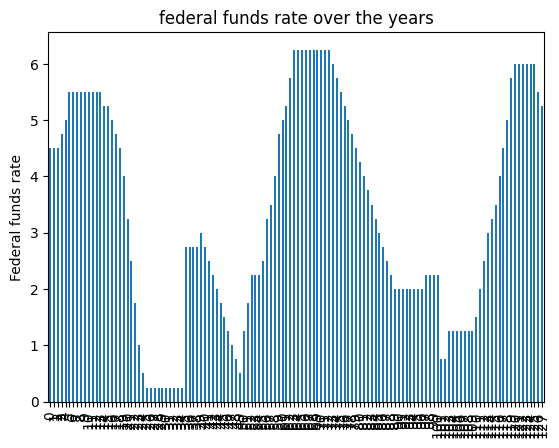

In [7]:
funds_plot = df_Fund_Rate_Cleaned["Discount Rate\n"].plot(kind = "bar") #created a bar graph looking at federal funds rate
funds_plot.set_title("federal funds rate over the years") # changed title
funds_plot.set_ylabel("Federal funds rate") # set a y label

to_save = funds_plot.get_figure() # .getfigure becuase otherwise .savefig doesnt work

to_save.savefig("/content/drive/MyDrive/FundFinder/Federal_Funds_Rate_Plot.jpg") # saves the figure to Fund Finder folder

# **Unemployment rates**

In [8]:
page_to_scrape_2 = "https://en.wikipedia.org/wiki/Unemployment_in_the_United_States" # webpage scraping from
request_2 = requests.get(page_to_scrape_2) # request

soup2 = BeautifulSoup(request_2.text, "lxml") # using soup lxml model to read the page

table2=soup2.find("table", class_="wikitable") # finding the table we want to extract from

df_unemployment = pd.DataFrame(columns=["year","rate"]) # this table didnt have a built in th so we created column names ourselves

rows = table2.find_all("tr") # looking in the table for each row

for i in rows[1:]: # for all rows but the first (it is the title row)
  data = i.find_all("td") # looking for all the data in each row
  row = [tr.text for tr in data] # taking the actual text out to put in the dataframe

  l = len(df_unemployment)# set l equal to length of dataframe
  df_unemployment.loc[l] = row # so every time a element row is aded it goes up and is added into the dataframe

print(df_unemployment)


      year            rate
0   2001\n           4.7\n
1   2002\n           5.8\n
2   2003\n           6.0\n
3   2004\n           5.5\n
4   2005\n           5.1\n
5   2006\n           4.6\n
6   2007\n           4.6\n
7   2008\n           5.8\n
8   2009\n           9.3\n
9   2010\n           9.6\n
10  2011\n           8.9\n
11  2012\n           8.1\n
12  2013\n           7.4\n
13  2014\n           6.2\n
14  2015\n           5.3\n
15  2016\n           4.9\n
16  2017\n           4.4\n
17  2018\n           3.9\n
18  2019\n           3.7\n
19  2020\n           8.1\n
20  2021\n           5.3\n
21  2022\n  3.6\n[214]\n\n


# **cleaning up data**

In [9]:
df_unemployment_cleaned = df_unemployment # creating a dataframe to be cleaned
print(df_unemployment_cleaned.columns)
df_unemployment_cleaned["rate"] = df_unemployment_cleaned["rate"].astype(str) # sets it to str in case we run this cell more than once to avoid a error
df_unemployment_cleaned["rate"] = df_unemployment_cleaned["rate"].str.replace("\n","").str.replace("[","").str.replace("]","") # replaces charaters that would make it unable to convert to a float
df_unemployment_cleaned["rate"] = df_unemployment_cleaned["rate"].astype(float) # converts to a float to train
print(df_unemployment_cleaned)


Index(['year', 'rate'], dtype='object')
      year    rate
0   2001\n  4.7000
1   2002\n  5.8000
2   2003\n  6.0000
3   2004\n  5.5000
4   2005\n  5.1000
5   2006\n  4.6000
6   2007\n  4.6000
7   2008\n  5.8000
8   2009\n  9.3000
9   2010\n  9.6000
10  2011\n  8.9000
11  2012\n  8.1000
12  2013\n  7.4000
13  2014\n  6.2000
14  2015\n  5.3000
15  2016\n  4.9000
16  2017\n  4.4000
17  2018\n  3.9000
18  2019\n  3.7000
19  2020\n  8.1000
20  2021\n  5.3000
21  2022\n  3.6214


# **saving to google drive**

In [10]:
file_path2 = "/content/drive/MyDrive/FundFinder/unemployment.csv" # file location to save the data frame to
df_unemployment_cleaned.to_csv(file_path2 , index=False) # savng data frame as csv


# **Plot**

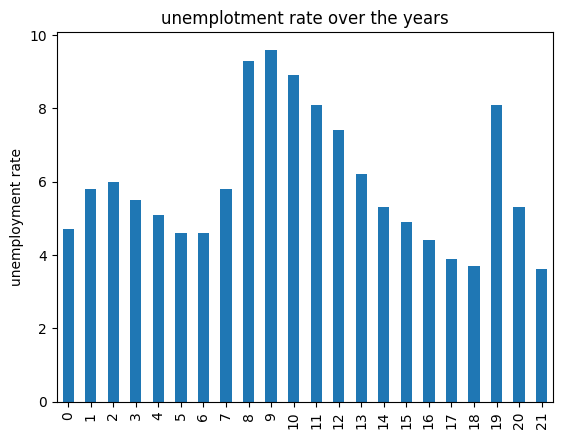

In [11]:
unemploy_rate_plot = df_unemployment_cleaned["rate"].plot(kind = "bar") # create the bar graph using the data
unemploy_rate_plot.set_title("unemplotment rate over the years") # set title
unemploy_rate_plot.set_ylabel("unemployment rate") # set y label

to_save2 = unemploy_rate_plot.get_figure() #get the fig to be able to use savefig

to_save2.savefig("/content/drive/MyDrive/FundFinder/unemployment_rate_plot.jpg") #saves to Fund Finder folder

# **Wikipedia GDP/Inflation/Unemployment**

In [12]:
page_to_scrape_3 = "https://en.wikipedia.org/wiki/Economy_of_the_United_States" # web page we are scraping
request_3 = requests.get(page_to_scrape_3) # sending a request to the site we want to scrape

print(request_3)

soup3 = BeautifulSoup(request_3.text, "lxml") # setting up soup to read from the website using the lxml model

table3 = soup3.find("table",class_ = "wikitable") # finding the table within the website

table_header3 = table3.find_all("th") # this table has headers so we scrape the headers to make the column titles

column_titles3 = [] # holding the table headers to be plugged in as the dataframe column titles

for i in table_header3: # sets the table headers to the column titles
  title = i.text
  column_titles3.append(title)

df_wiki_gdp = pd.DataFrame(columns=column_titles3) # creates empty data frame with the table headers as the column titles

row3 = table3.find_all("tr")

for i in row3[1:]:
  data3 = i.find_all("td")
  row3 = [tr.text for tr in data3]
  l = len(df_wiki_gdp)
  df_wiki_gdp.loc[l] = row3

print(df_wiki_gdp)



<Response [200]>
    Year\n GDP(in bn. US$PPP)\n GDP per capita(in US$ PPP)\n  \
0   1980\n            2,857.3\n                   12,552.9\n   
1   1981\n            3,207.0\n                   13,948.7\n   
2   1982\n            3,343.8\n                   14,405.0\n   
3   1983\n            3,634.0\n                   15,513.7\n   
4   1984\n            4,037.7\n                   17,086.4\n   
5   1985\n            4,339.0\n                   18,199.3\n   
6   1986\n            4,579.6\n                   19,034.8\n   
7   1987\n            4,855.3\n                   20,001.0\n   
8   1988\n            5,236.4\n                   21,376.0\n   
9   1989\n            5,641.6\n                   22,814.1\n   
10  1990\n            5,963.1\n                   23,848.0\n   
11  1991\n            6,158.1\n                   24,302.8\n   
12  1992\n            6,520.3\n                   25,392.9\n   
13  1993\n            6,858.6\n                   26,364.2\n   
14  1994\n            7

# **Data Cleaning for wiki Gdp**

In [13]:
df_wiki_gdp_cleaned = df_wiki_gdp

print(df_wiki_gdp_cleaned.columns)
# same as before replacing what needs to be replaced in order to convert the data to a float
df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"] = df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"].astype(str)
df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"] = df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"].str.replace("\n","").str.replace(",","")
df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"] = df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"].astype(float)

df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"] = df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"].astype(str)
df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"] = df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"].str.replace("\n","").str.replace(",","")
df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"] = df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"].astype(float)

df_wiki_gdp_cleaned["GDP(in bn. US$nominal)\n"] = df_wiki_gdp_cleaned["GDP(in bn. US$nominal)\n"].astype(str)
df_wiki_gdp_cleaned["GDP(in bn. US$nominal)\n"] = df_wiki_gdp_cleaned["GDP(in bn. US$nominal)\n"].str.replace("\n","").str.replace(",","")
df_wiki_gdp_cleaned["GDP(in bn. US$nominal)\n"] = df_wiki_gdp_cleaned["GDP(in bn. US$nominal)\n"].astype(float)

df_wiki_gdp_cleaned["GDP per capita(in US$ nominal)\n"] = df_wiki_gdp_cleaned["GDP per capita(in US$ nominal)\n"].astype(str)
df_wiki_gdp_cleaned["GDP per capita(in US$ nominal)\n"] = df_wiki_gdp_cleaned["GDP per capita(in US$ nominal)\n"].str.replace("\n","").str.replace(",","")
df_wiki_gdp_cleaned["GDP per capita(in US$ nominal)\n"] = df_wiki_gdp_cleaned["GDP per capita(in US$ nominal)\n"].astype(float)

df_wiki_gdp_cleaned["GDP growth(real)\n"] = df_wiki_gdp_cleaned["GDP growth(real)\n"].astype(str)
df_wiki_gdp_cleaned["GDP growth(real)\n"] = df_wiki_gdp_cleaned["GDP growth(real)\n"].str.replace("\n","").str.replace(",","").str.replace("%","").str.replace("−", "-")
df_wiki_gdp_cleaned["GDP growth(real)\n"] = df_wiki_gdp_cleaned["GDP growth(real)\n"].astype(float)


df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"] = df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"].astype(str)
df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"] = df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"].str.replace("\n","").str.replace(",","").str.replace("%","").str.replace("−", "-")
df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"] = df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"].astype(float)

df_wiki_gdp_cleaned["Unemployment(in Percent)\n"] = df_wiki_gdp_cleaned["Unemployment(in Percent)\n"].astype(str)
df_wiki_gdp_cleaned["Unemployment(in Percent)\n"] = df_wiki_gdp_cleaned["Unemployment(in Percent)\n"].str.replace("\n","").str.replace(",","").str.replace("%","").str.replace("−", "-")
df_wiki_gdp_cleaned["Unemployment(in Percent)\n"] = df_wiki_gdp_cleaned["Unemployment(in Percent)\n"].astype(float)

print(df_wiki_gdp_cleaned)

Index(['Year\n', 'GDP(in bn. US$PPP)\n', 'GDP per capita(in US$ PPP)\n',
       'GDP(in bn. US$nominal)\n', 'GDP per capita(in US$ nominal)\n',
       'GDP growth(real)\n', 'Inflation rate(in Percent)\n',
       'Unemployment(in Percent)\n', 'Government debt(in % of GDP)\n'],
      dtype='object')
    Year\n  GDP(in bn. US$PPP)\n  GDP per capita(in US$ PPP)\n  \
0   1980\n                2857.3                       12552.9   
1   1981\n                3207.0                       13948.7   
2   1982\n                3343.8                       14405.0   
3   1983\n                3634.0                       15513.7   
4   1984\n                4037.7                       17086.4   
5   1985\n                4339.0                       18199.3   
6   1986\n                4579.6                       19034.8   
7   1987\n                4855.3                       20001.0   
8   1988\n                5236.4                       21376.0   
9   1989\n                5641.6         

# **saving to colab**

In [14]:
file_path3 = "/content/drive/MyDrive/FundFinder/wiki_gdp.csv" #saving to the folder again
df_wiki_gdp_cleaned.to_csv(file_path3, index=False)

# **Bar Graphs**

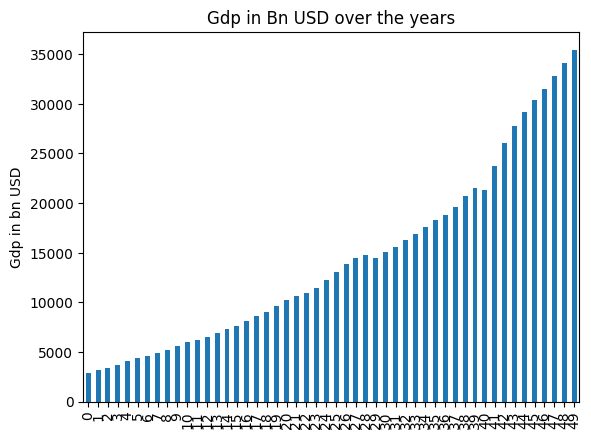

In [15]:
gdp_graph1 = df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"].plot(kind = "bar") # creates graph
gdp_graph1.set_title("Gdp in Bn USD over the years") # title
gdp_graph1.set_ylabel("Gdp in bn USD") # sets the label title

to_save3 = gdp_graph1.get_figure() # makes fig

to_save3.savefig("/content/drive/MyDrive/FundFinder/Gdp_inbn_usd.jpg") # saves fig

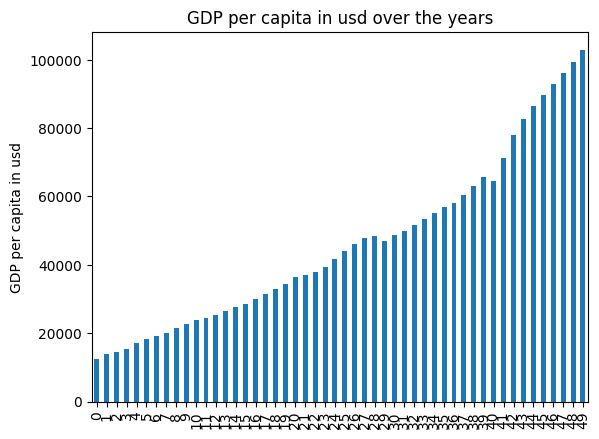

In [16]:
gdp_graph2 = df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"].plot(kind = "bar")# creates graph
gdp_graph2.set_title("GDP per capita in usd over the years") # sets title
gdp_graph2.set_ylabel("GDP per capita in usd") # sets y label

to_save4 = gdp_graph2.get_figure() # gets figure

to_save4.savefig("/content/drive/MyDrive/FundFinder/Gdp_percap_usd.jpg") # saves figure to fund finder

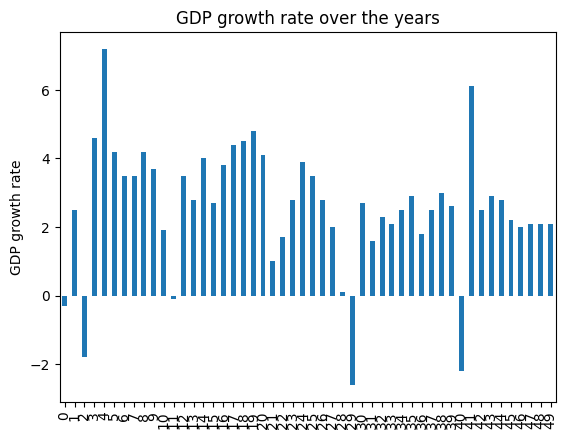

In [17]:
gdp_graph3 = df_wiki_gdp_cleaned["GDP growth(real)\n"].plot(kind = "bar") #creates graph
gdp_graph3.set_title("GDP growth rate over the years") # sets title
gdp_graph3.set_ylabel("GDP growth rate") # sets y label

to_save5 = gdp_graph3.get_figure() # gets the figure

to_save5.savefig("/content/drive/MyDrive/FundFinder/Gdp_Growth_Rate.jpg")

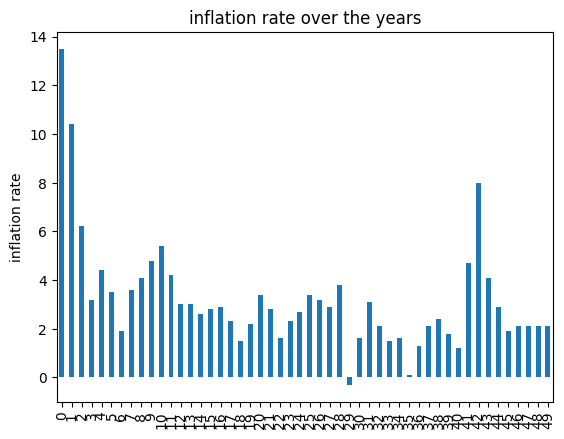

In [18]:
gdp_graph4 = df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"].plot(kind="bar") # creates graph
gdp_graph4.set_title("inflation rate over the years") # sets title
gdp_graph4.set_ylabel("inflation rate")# sets y label

to_save6 = gdp_graph4.get_figure() # gets figure

to_save6.savefig("/content/drive/MyDrive/FundFinder/Inflation_rate.jpg") # saves the figure to fund finder

# **Investopedia **
decided to not use this data in the end as it kept chaning its web format and wouldnt accpet request half the time but left in the code to show that other websites would indeed work

In [19]:
page_to_scrape_4 = "https://www.investopedia.com/inflation-rate-by-year-7253832"

request_4 = requests.get(page_to_scrape_4)

print(request_4)
#checking
if request_4.status_code == 200:
  print(" it was a accepted request ")
  was_invest_inflation = True

  soup4 = BeautifulSoup(request_4.text, "lxml")

  table4 = soup4.find("table",class_ = "mntl-sc-block-universal-table__table")

  df_invest_inflation = pd.DataFrame(columns=["year","rate","funds_rate","cycle","events"])

  rows4 = table4.find_all("tr")

  for i in rows4[1:]:
    data4 = i.find_all("td")
    row = [tr.text for tr in data4]
    print(row)
    l = len(df_invest_inflation)
    df_invest_inflation.loc[l] = row

    print(df_invest_inflation)


else :
  print("it was not a accepted request ")
  was_invest_inflation = False


<Response [200]>
 it was a accepted request 
['1929', '0.60%', 'NA', 'August peak', 'Market crash']
   year   rate funds_rate        cycle        events
0  1929  0.60%         NA  August peak  Market crash
['1930', '-6.40%', 'NA', 'Contraction (-8.5%)', 'Smoot-Hawley Tariff Act']
   year    rate funds_rate                cycle                   events
0  1929   0.60%         NA          August peak             Market crash
1  1930  -6.40%         NA  Contraction (-8.5%)  Smoot-Hawley Tariff Act
['1931', '-9.30%', 'NA', 'Contraction (-6.4%)', 'Dust Bowl began']
   year    rate funds_rate                cycle                   events
0  1929   0.60%         NA          August peak             Market crash
1  1930  -6.40%         NA  Contraction (-8.5%)  Smoot-Hawley Tariff Act
2  1931  -9.30%         NA  Contraction (-6.4%)          Dust Bowl began
['1932', '-10.30%', 'NA', 'Contraction (-12.9%)', 'Hoover tax hikes']
   year     rate funds_rate                 cycle                   eve

# *Data Cleaning for investopedia inflation rates*

In [20]:
if was_invest_inflation == True:
  df_invest_inflation_cleaned = df_invest_inflation
#data cleaning again
  df_invest_inflation_cleaned["rate"] = df_invest_inflation_cleaned["rate"].astype(str)
  df_invest_inflation_cleaned["rate"] = df_invest_inflation_cleaned["rate"].str.replace("\n","").str.replace(",","").str.replace("−", "-").str.replace("%","")
  df_invest_inflation_cleaned["rate"] = df_invest_inflation_cleaned["rate"].astype(float)

  df_invest_inflation_cleaned["funds_rate"] = df_invest_inflation_cleaned["funds_rate"].astype(str)
  df_invest_inflation_cleaned["funds_rate"] = df_invest_inflation_cleaned["funds_rate"].str.replace("\n","").str.replace(",","").str.replace("−", "-").str.replace("%","")




  print(df_invest_inflation_cleaned)
else:
  print("the page denied the request there was no data to clean")

    year  rate funds_rate                               cycle  \
0   1929   0.6         NA                         August peak   
1   1930  -6.4         NA                 Contraction (-8.5%)   
2   1931  -9.3         NA                 Contraction (-6.4%)   
3   1932 -10.3         NA                Contraction (-12.9%)   
4   1933   0.8         NA  Contraction ended in March (-1.2%)   
..   ...   ...        ...                                 ...   
91  2020   1.4       0.25                 Contraction (-2.2%)   
92  2021   7.0       0.25                    Expansion (5.8%)   
93  2022   6.5       4.50                    Expansion (1.9%)   
94  2023   3.4       5.50                    Expansion (2.5%)   
95  2024   2.9       4.48                    Expansion (2.8%)   

                     events  
0              Market crash  
1   Smoot-Hawley Tariff Act  
2           Dust Bowl began  
3          Hoover tax hikes  
4            FDR’s New Deal  
..                      ...  
91       

# **save to folder**

In [21]:
if was_invest_inflation == True: # was made into a if statement in case it didnt accept the request
  file_path4 = "/content/drive/MyDrive/FundFinder/invest_inflation.csv"
  df_invest_inflation_cleaned.to_csv(file_path4, index=False)

# **Predictions **

In [22]:

df_y = df_Fund_Rate_Cleaned[["Discount Rate\n"]] # sets the federal funds rate data to its own dataframe y



#below we create the x dataframe by adding together the data we have gatherd from the gdp data set as well as the unemployment data set together
df_x = df_wiki_gdp_cleaned[["GDP(in bn. US$PPP)\n","GDP per capita(in US$ PPP)\n","GDP(in bn. US$nominal)\n","GDP per capita(in US$ nominal)\n","GDP growth(real)\n","Inflation rate(in Percent)\n","Unemployment(in Percent)\n"]].add(df_unemployment_cleaned[["rate"]],fill_value=0)
df_xlen = len(df_x) # finding the x datasets length
df_ylen = len(df_y) # finding the y datasets length

df_diff = df_ylen - df_xlen # finds the difference between lengths

df_x = df_x.reindex(range(len(df_x)+df_diff)) #adds empty columns to the x data set becuase the datasets need to be same length for linear regression model to work

mean_rate_unemploy = df_unemployment_cleaned["rate"].mean() # finds the mean of unemployment rate
df_x["rate"] = df_x["rate"].fillna(mean_rate_unemploy) # fills empty rows with the mean value

#for the next below section we set a varable to the mean value then fills the extra values with the mean this is the best way i could think to do this without just having the same amount of data
mean_Gdp1 = df_wiki_gdp_cleaned["GDP(in bn. US$PPP)\n"].mean()
df_x["GDP(in bn. US$PPP)\n"] = df_x["GDP(in bn. US$PPP)\n"].fillna(mean_Gdp1)

mean_gdp2 = df_wiki_gdp_cleaned["GDP per capita(in US$ PPP)\n"].mean()
df_x["GDP per capita(in US$ PPP)\n"] = df_x["GDP per capita(in US$ PPP)\n"].fillna(mean_gdp2)

mean_gdp3 = df_wiki_gdp_cleaned["GDP(in bn. US$nominal)\n"].mean()
df_x["GDP(in bn. US$nominal)\n"] = df_x["GDP(in bn. US$nominal)\n"].fillna(mean_gdp3)

mean_gdp4 = df_wiki_gdp_cleaned["GDP per capita(in US$ nominal)\n"].mean()
df_x["GDP per capita(in US$ nominal)\n"] = df_x["GDP per capita(in US$ nominal)\n"].fillna(mean_gdp4)

mean_gdp5 = df_wiki_gdp_cleaned["GDP growth(real)\n"].mean()
df_x["GDP growth(real)\n"] = df_x["GDP growth(real)\n"].fillna(mean_gdp5)

mean_gdp6 = df_wiki_gdp_cleaned["Inflation rate(in Percent)\n"].mean()
df_x["Inflation rate(in Percent)\n"] = df_x["Inflation rate(in Percent)\n"].fillna(mean_gdp6)

mean_gdp7 = df_wiki_gdp_cleaned["Unemployment(in Percent)\n"].mean()
df_x["Unemployment(in Percent)\n"] = df_x["Unemployment(in Percent)\n"].fillna(mean_gdp7)





#sets x and y to there dataframes
x= df_x
y= df_y

#creates the train test split the trained data test based on the test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# we make the machine model set it as a linear regression model then fit the training data to it
machine_model = LinearRegression()
machine_model.fit(x_train,y_train)
# we create a prediction variable to predict the next value
y_pred = machine_model.predict(x_test)

#we take the first next prediction and then print it out along side the mean squared error which is just a number to see how accurate it is by seeing the diffrence between predicted and actual values
predicted_value= machine_model.predict(x_test.head(1)) # x_test
print("the next value may be ",predicted_value)
accuracy = mean_squared_error(y_test,y_pred)
print("the mean squared error is ",accuracy)


the next value may be  [[3.37183157]]
the mean squared error is  2.3589899891339674


# **Save the prediction**

In [23]:
file_path5 = "/content/drive/MyDrive/FundFinder/Predicted_Value.csv" #where i want to save it

df_prediction = pd.DataFrame(predicted_value,columns=["Predicted Value"]) #creating a dataframe with just the predicted value
df_prediction.to_csv(file_path5, index=False) #saves it to the fund finder file